In [69]:
# Copyright 2024 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Getting Started with Claude Models
<table align="left">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/GoogleCloudPlatform/vertex-ai-samples/blob/main/notebooks/official/generative_ai/anthropic_claude_3_intro.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/colab-logo-32px.png" alt="Google Colaboratory logo"><br> Open in Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/colab/import/https:%2F%2Fraw.githubusercontent.com%2FGoogleCloudPlatform%2Fvertex-ai-samples%2Fmain%2Fnotebooks%2Fofficial%2Fgenerative_ai%2Fanthropic_claude_3_intro.ipynb">
      <img width="32px" src="https://cloud.google.com/ml-engine/images/colab-enterprise-logo-32px.png" alt="Google Cloud Colab Enterprise logo"><br> Open in Colab Enterprise
    </a>
  </td>
  <td style="text-align: center">                                                                             
    <a href="https://console.cloud.google.com/vertex-ai/notebooks/deploy-notebook?download_url=https://raw.githubusercontent.com/GoogleCloudPlatform/vertex-ai-samples/main/notebooks/official/generative_ai/anthropic_claude_3_intro.ipynb">
      <img src="https://lh3.googleusercontent.com/UiNooY4LUgW_oTvpsNhPpQzsstV5W8F7rYgxgGBD85cWJoLmrOzhVs_ksK_vgx40SHs7jCqkTkCk=e14-rj-sc0xffffff-h130-w32" alt="Vertex AI logo"><br> Open in Workbench
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://github.com/GoogleCloudPlatform/vertex-ai-samples/blob/main/notebooks/official/generative_ai/anthropic_claude_3_intro.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/github-logo-32px.png" alt="GitHub logo"><br> View on GitHub
    </a>
  </td>
  
</table>

## Overview

### Claude on Vertex AI

Anthropic Claude models on Vertex AI offer fully managed and serverless models are offered as managed APIs. To use a Claude model on Vertex AI, send a request directly to the Vertex AI API endpoint.

You can stream your Claude responses to reduce the end-user latency perception. A streamed response uses server-sent events (SSE) to incrementally stream the response.

### Available Anthropic Claude models

#### Claude 3.5 Sonnet v2
The upgraded Claude 3.5 Sonnet is now state-of-the-art for a variety of tasks including real-world software engineering, enhanced agentic capabilities, and computer use.

#### Claude 3.5 Haiku
Claude 3.5 Haiku, Anthropic’s fastest and most cost-effective model, excels at use cases like code and test case generation, sub-agents, and user-facing chatbots.

#### Claude 3.5 Sonnet
Anthropic's most powerful AI model. Claude 3.5 Sonnet outperforms competitor models and Claude 3 Opus at higher speeds and lower cost.

#### Claude 3 Opus
Claude 3 Opus is Anthropic's second-most intelligent AI model, with top-level performance on highly complex tasks.

#### Claude 3 Haiku
Anthropic Claude 3 Haiku is Anthropic's fastest, most compact vision and text model for near-instant responses to simple queries, meant for seamless AI experiences mimicking human interactions.

#### Claude 3 Sonnet
Anthropic Claude 3 Sonnet is engineered to be dependable for scaled AI deployments across a variety of use cases.

All Claude models can process images and return text outputs, and feature a 200K context window.

## Objective

This notebook shows how to use **Vertex AI API** and **Anthropic’s Vertex SDK for Python** to call the Claude models on Vertex AI API.

For more information, see the [Use Claude](https://cloud.google.com/vertex-ai/generative-ai/docs/partner-models/use-claude) documentation.


## Vertex AI API

## Get Started


### Install required packages


In [70]:
!pip install -U -q httpx

### Restart runtime (Colab only)

To use the newly installed packages, you must restart the runtime on Google Colab.

In [71]:
import sys

if "google.colab" in sys.modules:

    import IPython

    app = IPython.Application.instance()
    app.kernel.do_shutdown(True)

<div class="alert alert-block alert-warning">
<b>⚠️ The kernel is going to restart. Wait until it's finished before continuing to the next step. ⚠️</b>
</div>


### Authenticate your notebook environment (Colab only)

Authenticate your environment on Google Colab.


In [72]:
import sys

if "google.colab" in sys.modules:

    from google.colab import auth

    auth.authenticate_user()

#### Select Claude model

In [73]:
MODEL = "claude-3-5-sonnet-v2@20241022"  # @param ["claude-3-5-sonnet-v2@20241022", "claude-3-5-haiku@20241022", "claude-3-5-sonnet@20240620", "claude-3-opus@20240229", "claude-3-haiku@20240307", "claude-3-sonnet@20240229" ]
if MODEL == "claude-3-5-sonnet-v2@20241022":
    available_regions = ["us-east5", "europe-west1"]
elif MODEL == "claude-3-5-haiku@20241022":
    available_regions = ["us-east5"]
elif MODEL == "claude-3-5-sonnet@20240620":
    available_regions = ["us-east5", "europe-west1", "asia-southeast1"]
elif MODEL == "claude-3-opus@20240229":
    available_regions = ["us-east5"]
elif MODEL == "claude-3-haiku@20240307":
    available_regions = ["us-east5", "europe-west1", "asia-southeast1"]
elif MODEL == "claude-3-sonnet@20240229":
    available_regions = ["us-east5"]

#### Select a location

In [74]:
import ipywidgets as widgets
from IPython.display import display

dropdown = widgets.Dropdown(
    options=available_regions,
    description="Select a location:",
    font_weight="bold",
    style={"description_width": "initial"},
)


def dropdown_eventhandler(change):
    global LOCATION
    if change["type"] == "change" and change["name"] == "value":
        LOCATION = change.new
        print("Selected:", change.new)


LOCATION = dropdown.value
dropdown.observe(dropdown_eventhandler, names="value")
display(dropdown)

Dropdown(description='Select a location:', options=('us-east5', 'europe-west1'), style=DescriptionStyle(descri…

#### Set Google Cloud project and model information

To get started using Vertex AI, you must have an existing Google Cloud project and [enable the Vertex AI API](https://console.cloud.google.com/flows/enableapi?apiid=aiplatform.googleapis.com). Learn more about [setting up a project and a development environment](https://cloud.google.com/vertex-ai/docs/start/cloud-environment).

In [ ]:
PROJECT_ID = "your-gcp-project"  # @param {type:"string"}
ENDPOINT = f"https://{LOCATION}-aiplatform.googleapis.com"

print (ENDPOINT)
if not PROJECT_ID or PROJECT_ID == "[your-project-id]":
    raise ValueError("Please set your PROJECT_ID")

https://us-east5-aiplatform.googleapis.com


#### Import required libraries

In [76]:
import base64
import json

import httpx
import requests
from IPython.display import Image

### Text generation

#### Unary call

Sends a POST request to the specified API endpoint to get a response from the model for a banana bread recipe using the provided payload.

In [77]:
PAYLOAD = {
    "anthropic_version": "vertex-2023-10-16",
    "messages": [{"role": "user", "content": "Send me a recipe for banana bread."}],
    "max_tokens": 100,
    "stream": False,
}

request = json.dumps(PAYLOAD).replace('"', '\\"')  # Escape double quotes
access_token = !gcloud auth print-access-token
token = access_token[0].strip()

!curl -X POST -H "Authorization: Bearer {token}" -H "Content-Type: application/json" {ENDPOINT}/v1/projects/{PROJECT_ID}/locations/{LOCATION}/publishers/anthropic/models/{MODEL}:rawPredict -d "{request}"

{"id":"msg_vrtx_01Egmggd4iEdrkAwr2v6Hn5h","type":"message","role":"assistant","model":"claude-3-5-sonnet-v2-20241022","content":[{"type":"text","text":"Here's a simple banana bread recipe:\n\nIngredients:\n- 3 ripe bananas, mashed\n- 1/3 cup melted butter\n- 1/2 cup sugar\n- 1 egg\n- 1 teaspoon vanilla extract\n- 1 teaspoon baking soda\n- 1/4 teaspoon salt\n- 1 1/2 cups all-purpose flour\n- Optional"}],"stop_reason":"max_tokens","stop_sequence":null,"usage":{"input_tokens":15,"output_tokens":100}}


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   159    0     0  100   159      0    128  0:00:01  0:00:01 --:--:--   129
100   661    0   502  100   159    263     83  0:00:01  0:00:01 --:--:--   348


#### Streaming call

Sends a POST request to the specified API endpoint to stream a response from the model for a banana bread recipe using the provided payload.

In [78]:
access_token = !gcloud auth print-access-token
token = access_token[0].strip()

In [79]:
PAYLOAD = {
    "anthropic_version": "vertex-2023-10-16",
    "messages": [{"role": "user", "content": "Send me a recipe for banana bread."}],
    "max_tokens": 100,
    "stream": True,
}

request = json.dumps(PAYLOAD).replace('"', '\\"')  # Escape double quotes

!curl -X POST -H "Authorization: Bearer {token}" -H "Content-Type: application/json" {ENDPOINT}/v1/projects/{PROJECT_ID}/locations/{LOCATION}/publishers/anthropic/models/{MODEL}:rawPredict -d "{request}"

event: vertex_event
data: {"type":"vertex_event","usage":{"input_tokens":15,"output_tokens":2}     }

event: message_start
data: {"type":"message_start","message":{"id":"msg_vrtx_01HsYzFCsSEQzRsB3Wc9Vshr","type":"message","role":"assistant","model":"claude-3-5-sonnet-v2-20241022","content":[],"stop_reason":null,"stop_sequence":null,"usage":{"input_tokens":15,"output_tokens":2}}}

event: ping
data: {"type": "ping"}

event: content_block_start
data: {"type":"content_block_start","index":0,"content_block":{"type":"text","text":""}             }

event: content_block_delta
data: {"type":"content_block_delta","index":0,"delta":{"type":"text_delta","text":"Here's"}      }

event: content_block_delta
data: {"type":"content_block_delta","index":0,"delta":{"type":"text_delta","text":" a simple"}   }

event: content_block_delta
data: {"type":"content_block_delta","index":0,"delta":{"type":"text_delta","text":" banana"}       }

event: content_block_delta
data: {"type":"content_block_delta","inde

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   158    0     0  100   158      0    129  0:00:01  0:00:01 --:--:--   130
100   808    0   650  100   158    350     85  0:00:01  0:00:01 --:--:--   437
100  5133    0  4975  100   158   2678     85  0:00:01  0:00:01 --:--:--  2777


In [80]:
PAYLOAD = {
    "anthropic_version": "vertex-2023-10-16",
    "messages": [{"role": "user", "content": "Send me a recipe for banana bread."}],
    "max_tokens": 100,
    "stream": True,
}

request = json.dumps(PAYLOAD).replace('"', '\\"')  # Escape double quotes
!curl -X POST -H "Authorization: Bearer {token}" -H "Content-Type: application/json" {ENDPOINT}/v1/projects/{PROJECT_ID}/locations/{LOCATION}/publishers/anthropic/models/{MODEL}:streamRawPredict -d '{request}'

{"type":"error","error":{"type":"invalid_request_error","message":"The request body is not valid JSON."}}


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   127    0   105  100    22    382     80 --:--:-- --:--:-- --:--:--   472
curl: (3) URL rejected: Bad hostname
curl: (3) URL rejected: Port number was not a decimal number between 0 and 65535
curl: (3) bad range specification in URL position 2:
[{"role":
 ^


### Vision

#### Encode And Preview Image

We fetch sample images from Wikipedia using the httpx library, but you can use whatever image sources work for you.

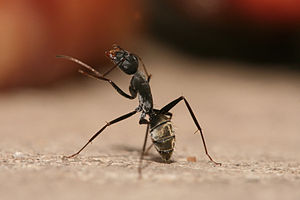

In [81]:
image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/a/a7/Camponotus_flavomarginatus_ant.jpg/300px-Camponotus_flavomarginatus_ant.jpg"
image_b64 = base64.b64encode(httpx.get(image_url).content).decode("utf-8")

response = requests.get(image_url)
image = Image(response.content, width=300, height=200)

image

#### Unary call

Sends a POST request to the specified API endpoint to get a response from the model analyzing the content of an image, provided as base64-encoded data, along with the text prompt.

In [82]:
# Create temp file with payload
import tempfile

PAYLOAD = {
    "anthropic_version": "vertex-2023-10-16",
    "messages": [{
        "role": "user", 
        "content": [
            {
                "type": "image",
                "source": {
                    "type": "base64",
                    "media_type": "image/jpeg",
                    "data": image_b64,
                }
            },
            {"type": "text", "text": "What is in this image?"}
        ]
    }],
    "max_tokens": 100,
    "stream": False,
}

# Write payload to temp file
with tempfile.NamedTemporaryFile(mode='w', delete=False, suffix='.json') as f:
    json.dump(PAYLOAD, f)
    temp_file = f.name

# Use curl with @filename 
!curl -X POST -H "Authorization: Bearer {token}" -H "Content-Type: application/json" {ENDPOINT}/v1/projects/{PROJECT_ID}/locations/{LOCATION}/publishers/anthropic/models/{MODEL}:rawPredict -d @{temp_file}

# Clean up
import os
os.unlink(temp_file)

{"id":"msg_vrtx_019VJpD2y4JuxgQx4GHJaZbB","type":"message","role":"assistant","model":"claude-3-5-sonnet-v2-20241022","content":[{"type":"text","text":"This is a close-up macro photograph of an ant. The image captures incredible detail of the ant's body structure, showing its distinctive segmented form, thin legs, and antennae. The ant appears to be in a standing or rearing position, and the photo has a shallow depth of field, creating a soft, blurred background while keeping the ant in sharp focus. The lighting and composition create a dramatic effect that highlights the ant's silhouette and gives a sense of the ins"}],"stop_reason":"max_tokens","stop_sequence":null,"usage":{"input_tokens":105,"output_tokens":100}}


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 16720    0     0  100 16720      0  13613  0:00:01  0:00:01 --:--:-- 13693
100 16720    0     0  100 16720      0   7478  0:00:02  0:00:02 --:--:--  7501
100 17445    0   725  100 16720    320   7394  0:00:02  0:00:02 --:--:--  7739


#### Streaming call

Sends a POST request to the specified API endpoint to stream a response from the model analyzing the content of an image, provided as base64-encoded data, along with the text prompt.

In [83]:
# Create temp file with payload
import tempfile

PAYLOAD = {
    "anthropic_version": "vertex-2023-10-16",
    "messages": [{
        "role": "user", 
        "content": [
            {
                "type": "image",
                "source": {
                    "type": "base64",
                    "media_type": "image/jpeg",
                    "data": image_b64,
                }
            },
            {"type": "text", "text": "What is in this image?"}
        ]
    }],
    "max_tokens": 100,
    "stream": True,
}

# Write payload to temp file
with tempfile.NamedTemporaryFile(mode='w', delete=False, suffix='.json') as f:
    json.dump(PAYLOAD, f)
    temp_file = f.name

# Use curl with @filename 
!curl -X POST -H "Authorization: Bearer {token}" -H "Content-Type: application/json" {ENDPOINT}/v1/projects/{PROJECT_ID}/locations/{LOCATION}/publishers/anthropic/models/{MODEL}:rawPredict -d @{temp_file}

# Clean up
import os
os.unlink(temp_file)

event: vertex_event
data: {"type":"vertex_event","usage":{"input_tokens":105,"output_tokens":1}          }

event: message_start
data: {"type":"message_start","message":{"id":"msg_vrtx_016r3KJcwRjBZ43dx2mkFLma","type":"message","role":"assistant","model":"claude-3-5-sonnet-v2-20241022","content":[],"stop_reason":null,"stop_sequence":null,"usage":{"input_tokens":105,"output_tokens":1}}               }

event: ping
data: {"type": "ping"}

event: content_block_start
data: {"type":"content_block_start","index":0,"content_block":{"type":"text","text":""}}

event: content_block_delta
data: {"type":"content_block_delta","index":0,"delta":{"type":"text_delta","text":"This"}         }

event: content_block_delta
data: {"type":"content_block_delta","index":0,"delta":{"type":"text_delta","text":" is"}   }

event: content_block_delta
data: {"type":"content_block_delta","index":0,"delta":{"type":"text_delta","text":" a"} }

event: content_block_delta
data: {"type":"content_block_delta","index":0,"d

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 16719    0     0  100 16719      0  13522  0:00:01  0:00:01 --:--:-- 13581
100 17369    0   650  100 16719    321   8275  0:00:02  0:00:02 --:--:--  8619
100 24348    0  7629  100 16719   3771   8266  0:00:02  0:00:02 --:--:-- 12071


## Using Anthropic's Vertex SDK for *Python*

## Get Started


### Install Anthropic's Vertex SDK for Python and other required packages

In [84]:
!pip install -U -q "anthropic[vertex]"
!pip install -U -q httpx

### Restart runtime (Colab only)

To use the newly installed packages, you must restart the runtime on Google Colab.

In [85]:
# Restart kernel after installs so that your environment can access the new packages
import sys

if "google.colab" in sys.modules:
    import IPython

    app = IPython.Application.instance()
    app.kernel.do_shutdown(True)

<div class="alert alert-block alert-warning">
<b>⚠️ The kernel is going to restart. Wait until it's finished before continuing to the next step. ⚠️</b>
</div>


### Authenticate your notebook environment (Colab only)

Authenticate your environment on Google Colab.


In [86]:
import sys

if "google.colab" in sys.modules:

    from google.colab import auth

    auth.authenticate_user()

#### Select Claude model

In [87]:
MODEL = "claude-3-5-sonnet-v2@20241022"  # @param ["claude-3-5-sonnet-v2@20241022", "claude-3-5-haiku@20241022", "claude-3-5-sonnet@20240620", "claude-3-opus@20240229", "claude-3-haiku@20240307", "claude-3-sonnet@20240229" ]
if MODEL == "claude-3-5-sonnet-v2@20241022":
    available_regions = ["us-east5", "europe-west1"]
elif MODEL == "claude-3-5-haiku@20241022":
    available_regions = ["us-east5"]
elif MODEL == "claude-3-5-sonnet@20240620":
    available_regions = ["us-east5", "europe-west1", "asia-southeast1"]
elif MODEL == "claude-3-opus@20240229":
    available_regions = ["us-east5"]
elif MODEL == "claude-3-haiku@20240307":
    available_regions = ["us-east5", "europe-west1", "asia-southeast1"]
elif MODEL == "claude-3-sonnet@20240229":
    available_regions = ["us-east5"]

#### Select a region

In [88]:
import ipywidgets as widgets
from IPython.display import display

dropdown = widgets.Dropdown(
    options=available_regions,
    description="Select a location:",
    font_weight="bold",
    style={"description_width": "initial"},
)


def dropdown_eventhandler(change):
    global LOCATION
    if change["type"] == "change" and change["name"] == "value":
        LOCATION = change.new
        print("Selected:", change.new)


LOCATION = dropdown.value
dropdown.observe(dropdown_eventhandler, names="value")
display(dropdown)

Dropdown(description='Select a location:', options=('us-east5', 'europe-west1'), style=DescriptionStyle(descri…

#### Set Google Cloud project and model information

To get started using Vertex AI, you must have an existing Google Cloud project and [enable the Vertex AI API](https://console.cloud.google.com/flows/enableapi?apiid=aiplatform.googleapis.com). Learn more about [setting up a project and a development environment](https://cloud.google.com/vertex-ai/docs/start/cloud-environment).

In [ ]:
PROJECT_ID = "your-gcp-project"  # @param {type:"string"}
ENDPOINT = f"https://{LOCATION}-aiplatform.googleapis.com"

if not PROJECT_ID or PROJECT_ID == "[your-project-id]":
    raise ValueError("Please set your PROJECT_ID")

#### Import required libraries

In [90]:
import base64

import httpx
import requests
from IPython.display import Image

### Text generation

#### Unary call

Initializes a client for Anthropic's Vertex AI, sends a request to generate the content, and prints the response in a formatted JSON

In [91]:
from anthropic import AnthropicVertex

client = AnthropicVertex(region=LOCATION, project_id=PROJECT_ID)
message = client.messages.create(
    max_tokens=1024,
    messages=[
        {
            "role": "user",
            "content": "Send me a recipe for banana bread.",
        }
    ],
    model=MODEL,
)
print(message.model_dump_json(indent=2))

{
  "id": "msg_vrtx_01PDVYS3g6C3pHYKGDyjTprm",
  "content": [
    {
      "text": "Here's a classic banana bread recipe:\n\nIngredients:\n- 3 ripe bananas, mashed\n- ⅓ cup melted butter\n- ½ cup sugar\n- 1 egg\n- 1 teaspoon vanilla extract\n- 1 teaspoon baking soda\n- ¼ teaspoon salt\n- 1½ cups all-purpose flour\n- Optional: ½ cup chopped nuts or chocolate chips\n\nInstructions:\n1. Preheat oven to 350°F (175°C). Grease a 4x8-inch loaf pan.\n\n2. In a large bowl, mash the ripe bananas with a fork.\n\n3. Mix in the melted butter.\n\n4. Stir in the sugar, egg, and vanilla extract.\n\n5. Sprinkle the baking soda and salt over the mixture and stir in.\n\n6. Add the flour and mix until just combined. Don't overmix.\n\n7. Fold in nuts or chocolate chips if using.\n\n8. Pour batter into prepared loaf pan.\n\n9. Bake for 50-60 minutes, or until a toothpick inserted into the center comes out clean.\n\n10. Let cool in the pan for a few minutes, then remove and cool completely on a wire rack.\n\n

#### Streaming call

Initializes a client for Anthropic's Vertex AI, sends a streaming request to generate the content, and continuously prints the received text as it is streamed.

In [92]:
from anthropic import AnthropicVertex

client = AnthropicVertex(region=LOCATION, project_id=PROJECT_ID)

with client.messages.stream(
    max_tokens=1024,
    messages=[
        {
            "role": "user",
            "content": "Send me a recipe for banana bread.",
        }
    ],
    model=MODEL,
) as stream:
    for text in stream.text_stream:
        print(text, end="", flush=True)

Here's a simple banana bread recipe:

INGREDIENTS:
- 3 ripe bananas, mashed
- 1/3 cup melted butter
- 1/2 cup sugar
- 1 egg
- 1 teaspoon vanilla extract
- 1 teaspoon baking soda
- 1/4 teaspoon salt
- 1 1/2 cups all-purpose flour
- Optional: 1/2 cup chopped nuts or chocolate chips

INSTRUCTIONS:

1. Preheat oven to 350°F (175°C). Grease a 4x8-inch loaf pan.

2. In a large bowl, mash the ripe bananas with a fork.

3. Mix in the melted butter.

4. Stir in the sugar, egg, and vanilla extract.

5. Sprinkle baking soda and salt over the mixture.

6. Add flour and mix until just combined (don't overmix).

7. Fold in nuts or chocolate chips if using.

8. Pour batter into prepared loaf pan.

9. Bake for 50-60 minutes, or until a toothpick inserted into the center comes out clean.

10. Let cool in the pan for a few minutes, then remove and cool completely on a wire rack.

Enjoy your homemade banana bread!

### Vision

#### Encode And Preview Image

We fetch sample images from Wikipedia using the httpx library, but you can use whatever image sources work for you.

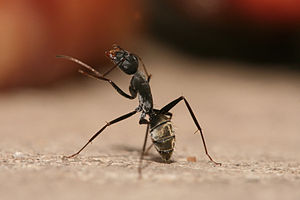

In [93]:
image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/a/a7/Camponotus_flavomarginatus_ant.jpg/300px-Camponotus_flavomarginatus_ant.jpg"
image_media_type = "image/jpeg"
image_b64 = base64.b64encode(httpx.get(image_url).content).decode("utf-8")

response = requests.get(image_url)
image = Image(response.content, width=300, height=200)

image

#### Unary call

Initializes a client for Anthropic's Vertex AI, sends a request to describe an image (provided as base64-encoded data) along with a text prompt, and prints the response in a formatted JSON.

In [94]:
from anthropic import AnthropicVertex

client = AnthropicVertex(region=LOCATION, project_id=PROJECT_ID)

message = client.messages.create(
    max_tokens=1024,
    messages=[
        {
            "role": "user",
            "content": [
                {
                    "type": "image",
                    "source": {
                        "type": "base64",
                        "media_type": image_media_type,
                        "data": image_b64,
                    },
                },
                {"type": "text", "text": "Describe this image."},
            ],
        }
    ],
    model=MODEL,
)
print(message.model_dump_json(indent=2))

{
  "id": "msg_vrtx_01XSCh37b5N1uNVdByNxv3Ch",
  "content": [
    {
      "text": "This is a detailed macro photograph of an ant in profile view. The ant appears to be in a standing or rearing position, with its legs clearly visible and distinct against a blurred, warm-toned background. The image captures incredible detail of the ant's segmented body, including its thorax, abdomen, and delicate antennae. The lighting creates a beautiful silhouette effect, emphasizing the ant's characteristic form and slender body structure. The photograph has a shallow depth of field, which helps isolate the ant from the background and creates an artistic, professional quality to the image.",
      "type": "text"
    }
  ],
  "model": "claude-3-5-sonnet-v2-20241022",
  "role": "assistant",
  "stop_reason": "end_turn",
  "stop_sequence": null,
  "type": "message",
  "usage": {
    "input_tokens": 104,
    "output_tokens": 127
  }
}


#### Streaming call

Initializes a client for Anthropic's Vertex AI, sends a streaming request to describe an image (provided as base64-encoded data) along with a text prompt, and continuously prints the received text as it is streamed.

In [95]:
from anthropic import AnthropicVertex

client = AnthropicVertex(region=LOCATION, project_id=PROJECT_ID)

with client.messages.stream(
    max_tokens=1024,
    messages=[
        {
            "role": "user",
            "content": [
                {
                    "type": "image",
                    "source": {
                        "type": "base64",
                        "media_type": image_media_type,
                        "data": image_b64,
                    },
                },
                {"type": "text", "text": "Describe this image."},
            ],
        }
    ],
    model=MODEL,
) as stream:
    for text in stream.text_stream:
        print(text, end="", flush=True)

This is a detailed macro photograph of an ant, captured in profile view. The ant appears to be standing on a textured surface, possibly stone or concrete. The image beautifully captures the ant's distinct body segments, including its slender legs, thorax, and antenna. The background is softly blurred with warm reddish tones, creating a pleasing bokeh effect that makes the ant's silhouette stand out dramatically. The lighting and close-up perspective allow you to see fine details of the ant's exoskeleton and its characteristic ant posture. This is the kind of photograph that helps us appreciate the intricate details of these small insects that we might otherwise miss with the naked eye.